<img src="../images/BDG_LOGO.png" alt="drawing" align="right" width="200"/>

# Report of the Price Prediction Results

###  Assessement of the experiment results for D4.3 (Pilot 5). 

In [1]:
import numpy as np
import pandas as pd
import datetime


import seaborn as sns
import plotly.express as px

# for plotting
import matplotlib.pyplot as plt
resolution = (12,7)
plt.rcParams["figure.figsize"] = resolution


## Auxiliar Functions

In [2]:
def plot_forecast(title, y_train, y_test, y_pred):
    
    y_train = y_train[0] if len(y_train) == 1 else y_train
    y_test = y_test[0] if len(y_test) == 1 else y_test
    y_pred = y_pred[0] if len(y_pred) == 1 else y_pred

    # Creates pandas DataFrame. 
    df_plot = pd.DataFrame({'forecast': [np.nan] * len(y_train) + list(y_pred), 
                            'price': list(np.reshape(y_train, len(y_train))) + list(y_test)}) 
    
    df_plot['price'].plot(figsize=resolution, title=title, grid=True)
    df_plot['forecast'].plot()
    plt.legend(loc=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

def plot_agg_timeseries(product_name):
    df_plot = df_data_raw_agg[df_data_raw_agg['product'] == product_name]
    title = 'Agg Price By Country: {0}'.format(product_name)
    plot_timeseries(df_plot, title)
    
def plot_ffoward_timeseries(product_name):
    df_plot = df_data_ffoward_agg[df_data_ffoward_agg['product'] == product_name]
    title = 'Agg Price By Country FFOWARD: {0}'.format(product_name)
    plot_timeseries(df_plot, title)
    
def plot_timeseries(df_plot, title):    
    fig = px.line(df_plot, x='date', y="price_mean", width=800, height=400).update_traces(mode='lines+markers')
    fig.update_layout(title_text=title,
                      xaxis_rangeslider_visible=False)
    # display
    fig.show()
    

In [3]:
# load the raw dataset
df_data_raw_agg = pd.read_csv("df_data_raw_agg.csv")

# load the ffoward dataset
df_data_ffoward_agg = pd.read_csv("df_data_forward_agg.csv")

## Parameters 

In [4]:
# 
dic_metric_abr = { 'mean_squared_error': 'mse', 'root_mean_squared_error': 'rmse'
                   , 'mean_absolute_error': 'mae'}

#
summary = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

# 
datetime_column_name = "date"

# path for results log
path_result = 'results/'

## 1. Baseline Comparison 

In [5]:
import os
print("show result logs: ", os.listdir("results/"))

show result logs:  ['stationary.csv', '.ipynb_checkpoints', 'results_lstm_fforward-backup.csv', 'results_bas_moving_avg.csv', 'results_lstm_fforward.csv', 'results_lstm_fforward2.csv', 'results_lstm_fforward-no-dropout-earlystop-150.csv', 'all_timeseries_filled_foward', 'results_bas_prev_value.csv']


In [6]:
!ls  results/

all_timeseries_filled_foward
results_bas_moving_avg.csv
results_bas_prev_value.csv
results_lstm_fforward2.csv
results_lstm_fforward-backup.csv
results_lstm_fforward.csv
results_lstm_fforward-no-dropout-earlystop-150.csv
stationary.csv


### 1.1 Individuals

In [7]:
# 
lst_columns_to_report = ['model_name' , 'product_name', 'root_mean_squared_error']  # 'mean_absolute_error', 'mean_squared_error' ,
exclude_products = ["μήλα ντελίσιους πιλαφά τριπολεως"]


# df_baseline = pd.read_csv(path_result + 'results_bas_prev_value.csv')
df_baseline = pd.read_csv(path_result + 'results_bas_moving_avg.csv')
df_lstm = pd.read_csv(path_result + 'results_lstm_fforward-no-dropout-earlystop-150.csv')

df_lstm = df_lstm[lst_columns_to_report]
df_baseline = df_baseline[lst_columns_to_report]

df = pd.merge(df_lstm, df_baseline, on='product_name', suffixes=('_lstm', '_bas'))

# show
columns = ['product_name', 'root_mean_squared_error_bas', 'root_mean_squared_error_lstm', 'improvement(%)']
df['improvement(%)'] = (df['root_mean_squared_error_bas']/ df['root_mean_squared_error_lstm'] - 1) * 100
df = df[df["product_name"].isin(exclude_products)==False][columns].sort_values(by="improvement(%)", ascending=False)
df['improvement(%)'] = df['improvement(%)'].apply(lambda x: x if x > 0 else 0.0)
df = df.round(3)




df.set_index("product_name")

,root_mean_squared_error_bas,root_mean_squared_error_lstm,improvement(%)
product_name,,,
pig carcases with 60% or more meat,1.749,0.815,114.578
pig carcases 55% or more but less than 60% meat,1.594,0.748,113.145
maize - maize deliver to first customer - silo or processing plant - on truck or other transport means,2.714,1.396,94.333
πατάτες εγχ.,0.015,0.009,59.841
virgin olive oil (up to 2°),13.376,8.437,58.548
piglet,0.765,0.489,56.429
soft wheat - milling wheat delivered to port - grain delivered to a port silo by train or truck or barge,2.929,2.220,31.916
"refined olive oil (up to 0,3°)",4.689,4.550,3.041
"extra virgin olive oil (up to 0,8°)",17.382,17.183,1.161


### 1.2 Grouped

In [8]:
# 
lst_columns_to_report = ['model_name' , 'mean_squared_error' , 'root_mean_squared_error'
                         , 'mean_absolute_error' ]

#
# lst_model_logs_to_compare = ['results_bas_prev_value.csv', 'results_lstm_fforward.csv']
lst_model_logs_to_compare = ['results_bas_moving_avg.csv', 'results_lstm_fforward-no-dropout-earlystop-150.csv']


# 
lst_comparison = []

# loop with the chosen logs
for result_log in lst_model_logs_to_compare:
    # load the results
    df_result = pd.read_csv(path_result + result_log)
    
    # set the columns name
    model_name = df_result['model_name'].unique()[0]
    
    # get statistic information
    df_describe = df_result[lst_columns_to_report].describe()
    
    # 
    lst_metrics = df_describe.loc["mean"].tolist()
    lst_metrics.insert(0, model_name)
    
    lst_comparison.append(lst_metrics)
    
    
df_g = pd.DataFrame(lst_comparison, columns=["model_name", "mean_squared_error", "root_mean_squared_error", "mean_absolute_error"])
df_g = df_g.round(3)
df_g

,model_name,mean_squared_error,root_mean_squared_error,mean_absolute_error
0,moving_avg,40.538,4.019,2.721
1,lstm_fforward,46.188,4.461,3.139


### Checking Raw and FFoward Timeseries

In [9]:
# product_name = 'extra virgin olive oil (up to 0,8°)'
# plot_agg_timeseries(product_name)

In [10]:
# plot_ffoward_timeseries(product_name)

### 2. Best Predictive Products

In [11]:
result_log = 'results_lstm_fforward-no-dropout-earlystop-150.csv'
exclude_products = ["μήλα ντελίσιους πιλαφά τριπολεως"] # this product has a constant time series

df_result = pd.read_csv(path_result + result_log)
df_result = df_result[df_result["product_name"].isin(exclude_products)==False]
df_result = df_result.sort_values(by=['root_mean_squared_error'])

lst_columns_to_report = ['model_name' , 'product_name' , 'mean_squared_error'
                         , 'root_mean_squared_error' , 'mean_absolute_error' ]

df_best = df_result.head(5)
df_best[lst_columns_to_report]

,model_name,product_name,mean_squared_error,root_mean_squared_error,mean_absolute_error
13,lstm_fforward,πατάτες εισαγ,0.000056,0.007452,0.002171
11,lstm_fforward,πατάτες εγχ.,0.000086,0.009291,0.004236
1,lstm_fforward,piglet,0.239190,0.489070,0.370312
0,lstm_fforward,pig carcases 55% or more but less than 60% meat,0.559596,0.748062,0.509527
10,lstm_fforward,pig carcases with 60% or more meat,0.664141,0.814948,0.625653


#### 2.1 Plot of the best predictions

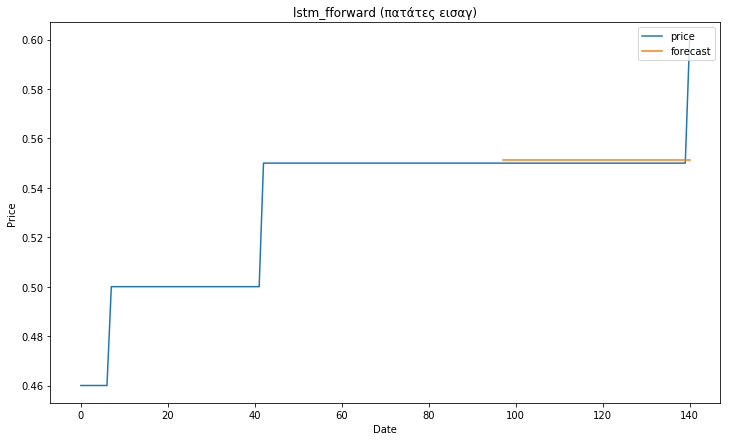

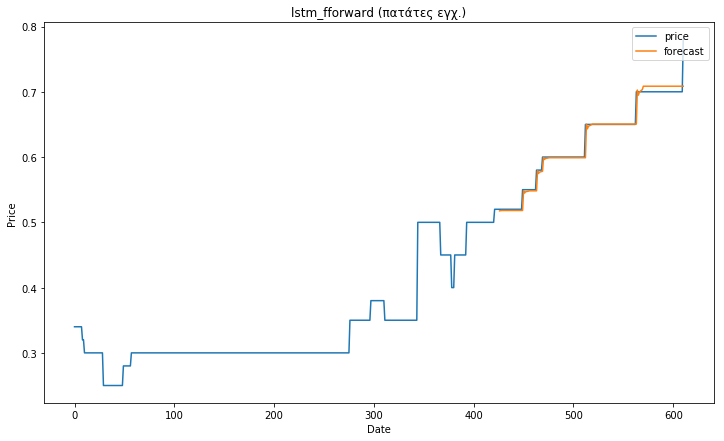

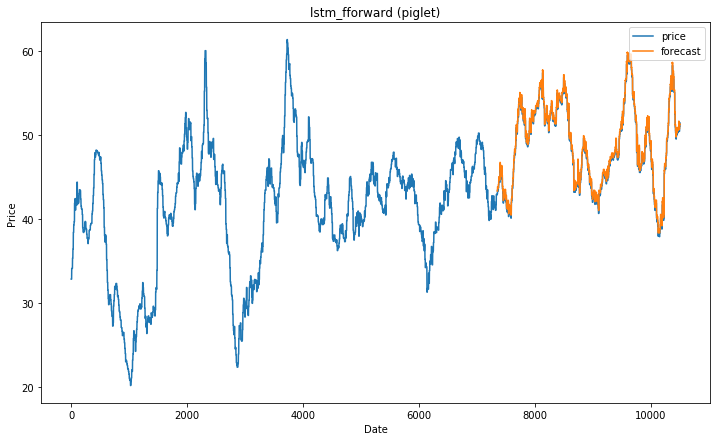

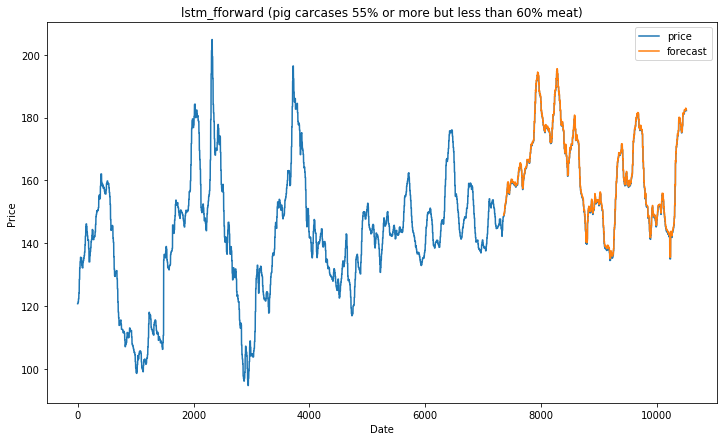

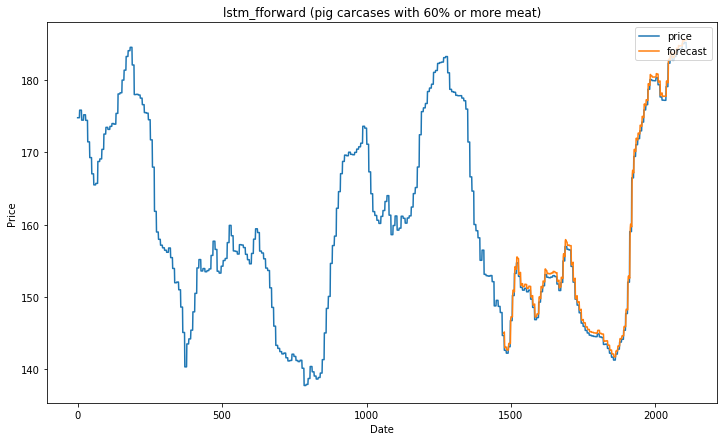

In [12]:

for index, row in df_best.iterrows():
    model_name, product_name, mse, rmse = row['model_name'], row['product_name'], row['mean_squared_error'], row['root_mean_squared_error']

    y_train, y_test, y_pred = eval(row['y_train']), eval(row['y_true']), eval(row['y_pred'])
    title = "{0} ({1})".format(model_name, product_name)
    plot_forecast(title, y_train, y_test, y_pred)


### 3. Worse Prediction Products

In [13]:
df_worse = df_result.tail(5)
lst_columns_to_report = ['model_name' , 'product_name' , 'mean_squared_error'
                         , 'root_mean_squared_error' , 'mean_absolute_error' ]

# list the 5 worse predictions
df_worse[lst_columns_to_report]

,model_name,product_name,mean_squared_error,root_mean_squared_error,mean_absolute_error
4,lstm_fforward,lampante olive oil (2°),38.716873,6.222288,4.671025
6,lstm_fforward,virgin olive oil (up to 2°),71.180071,8.436828,4.562842
2,lstm_fforward,crude olive-pomace oil (from 5 to 10°),74.158953,8.611559,6.680811
7,lstm_fforward,refined olive-pomace oil (up to 0.3°),138.282895,11.759375,9.054137
3,lstm_fforward,"extra virgin olive oil (up to 0,8°)",295.252883,17.182924,11.852230


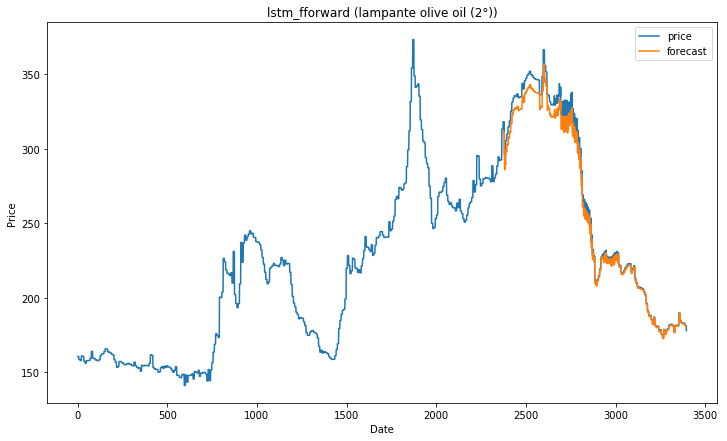

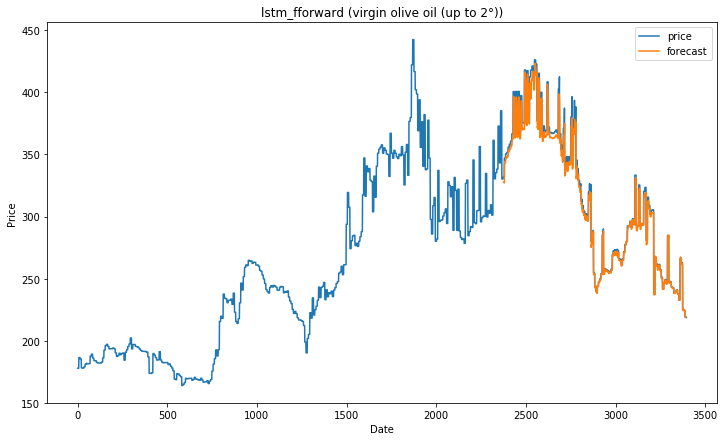

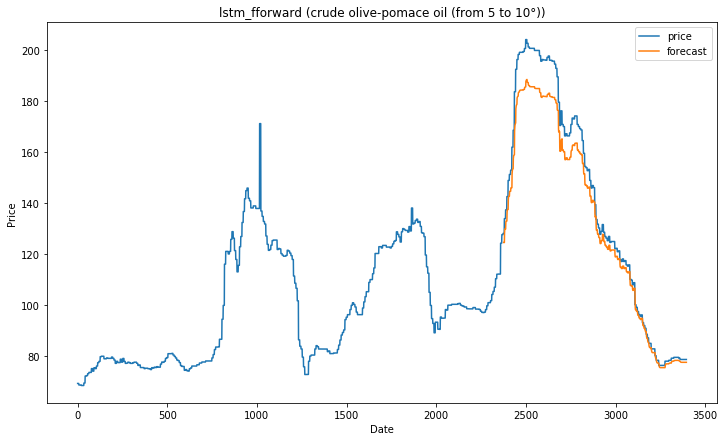

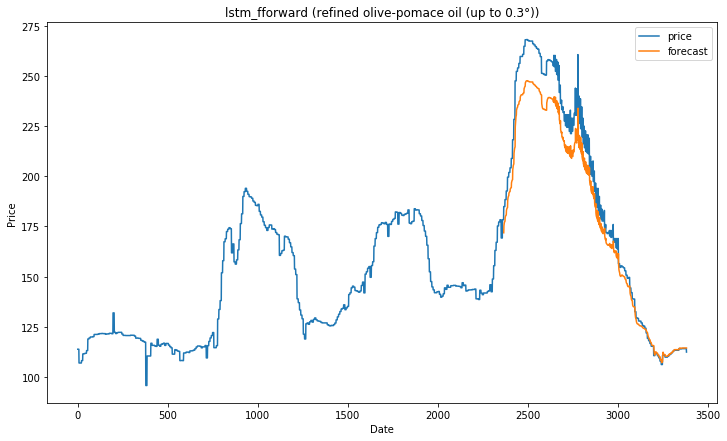

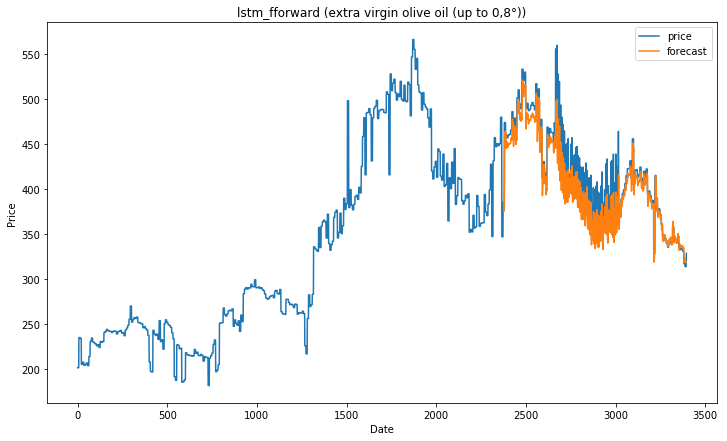

In [14]:

for index, row in df_worse.iterrows():
    model_name, product_name, mse, rmse = row['model_name'], row['product_name'], row['mean_squared_error'], row['root_mean_squared_error']
    
    y_train, y_test, y_pred = eval(row['y_train']), eval(row['y_true']), eval(row['y_pred'])
    title = "{0} ({1})".format(model_name, product_name)
    plot_forecast(title, y_train, y_test, y_pred)


##  4. Stationary Case 

In [15]:
df_stationary = pd.read_csv(path_result + "stationary.csv")
df_stationary = df_stationary.sort_values(by=["ADF_Statistic"]) # .sample(10)
df_stationary

,product,ADF_Statistic,p-value,crit.v. 1%,crit.v. 5%,crit.v. 10%,is_stationary
148,μαρούλια το κομμάτι,-128.937,0.000,-3.444,-2.868,-2.570,True
152,μπανάνες,-22.329,0.000,-3.440,-2.866,-2.569,True
67,"lettuces - laitues, iceberg, cat. i, cal. 400+",-8.563,0.000,-3.467,-2.878,-2.575,True
53,"apples - pommes, cox orange, cat. i - cal. 70-80",-8.424,0.000,-3.465,-2.877,-2.575,True
113,barley - malting barley departure from silo - ...,-7.427,0.000,-3.480,-2.883,-2.578,True
...,...,...,...,...,...,...,...
220,μοσχάρια εξωτερικού 4/μορια,-0.297,0.926,-3.464,-2.876,-2.575,False
154,πατάτες,-0.204,0.938,-3.451,-2.871,-2.572,False
219,μοσχάρια εγχώρια 4/μορια,-0.101,0.949,-3.464,-2.876,-2.575,False
68,"mushrooms - champignons, cultivated, fermés, c...",0.283,0.977,-3.469,-2.878,-2.576,False
